In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os

# show plot first run
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

In [2]:
def load_images(path: str, file_ending: str=".png") -> (list, int, int): # -> return values!
    """
    Load all images in path with matplotlib that have given file_ending

    Arguments:
    path: path of directory containing image files that can be assumed to have all the same dimensions
    file_ending: string that image files have to end with, if not->ignore file

    Return:
    images: list of images (each image as numpy.ndarray and dtype=float64)
    dimension_x: size of images in x direction
    dimension_y: size of images in y direction
    """

    images = []

    # TODO read each image in path as numpy.ndarray and append to images

    files = os.listdir(path)
    files.sort()
    for cur in files:
        if not cur.endswith(file_ending):
            continue

        try:
            image = mpl.image.imread(path + cur)
            img_mtx = np.asarray(image, dtype="float64")
            images.append(img_mtx)
        except:
            continue

    dimension_y = images[0].shape[0]
    dimension_x = images[0].shape[1]
    
    return images, dimension_x, dimension_y

SVD: (150, 150) (150,) (150, 11368)
encoded / compact image shape:  (150,)
reconstructed image shape:  (11368,)
reconstruction error:  3.413247952360215
encoded / compact image shape:  (150,)
reconstructed image shape:  (11368,)
reconstruction error:  11.587466916099304
encoded / compact image shape:  (150,)
reconstructed image shape:  (11368,)
reconstruction error:  10.689859229593816
encoded / compact image shape:  (150,)
reconstructed image shape:  (11368,)
reconstruction error:  10.01978660746338
encoded / compact image shape:  (150,)
reconstructed image shape:  (11368,)
reconstruction error:  12.699424770737831
encoded / compact image shape:  (150,)
reconstructed image shape:  (11368,)
reconstruction error:  11.928508169648476
encoded / compact image shape:  (150,)
reconstructed image shape:  (11368,)
reconstruction error:  9.655014884858216
encoded / compact image shape:  (150,)
reconstructed image shape:  (11368,)
reconstruction error:  7.62051159323212
encoded / compact image s

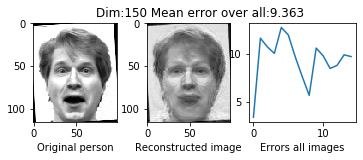

Mean error 9.362520042964487


In [3]:
if __name__ == '__main__':

    images, x, y = load_images('./data/train/')

    # setup data matrix
    D = np.zeros((len(images), images[0].size), dtype=images[0].dtype)
    for i in range(len(images)):
        D[i, :] = images[i].flatten()

    #print(D[:,int(images[0].size/2)])
    
    # 1. calculate and subtract mean to center the data in D
    # TODO YOUR CODE HERE
    #print(D[0:5,0:5])
    meanDim = np.mean(D,axis=0)
    #meanDim = D.mean(0)
    #print(meanDim[int(images[0].size/2)])
    D = D - meanDim 
    #D -= D.mean(0)
    #print(D[:,int(images[0].size/2)])
    
    #print(meanDim.shape)
    
    #print('meandim:',meanDim[0:5])
    
    # calculate PCA
    # 2. now we can do a linear operation on the data
    #    and find the best linear mapping (eigenbasis) - use the np.linalg.svd with the
    #    parameter 'full_matrices=False'
    # TODO YOUR CODE HERE
    U, S, VT = np.linalg.svd(D, full_matrices=False)
    print('SVD:',U.shape,S.shape, VT.shape) # 150 components

    # take 10 / 75 / 150 first eigenvectors
    k = 150
    
    # cut off number of Principal Components / compress the information to most important eigenvectors
    # That means we only need the first k rows in the Vt matrix
    # TODO YOUR CODE HERE
      
    # plot all the eigenfaces
    if 0:
        plt.figure(figsize = (20, 28))
        for i in range(len(S)):
            plt.subplot(29, 28, i+1), plt.axis('off'), plt.imshow(VT[i].reshape(y,x), cmap = plt.cm.gray)
        
        plt.show()

    #print(Vt.shape)
    Vred = VT[0:k,:]
    #print(Vred.shape)
    
    # create unity matrix with entries of valid coefficients
    #P = np.zeros((k,k),dtype=images[0].dtype)
    #for i in range(k):
    #    P[i,i] = S[i]

    # now we use the eigenbasis to compress and reconstruct test images
    # and measure their reconstruction error
    errors = []
    images_test, x, y = load_images('./data/test/')

    for i, test_image in enumerate(images_test):
        
        # flatten and center the test image
        # TODO YOUR CODE HERE
        #print(test_image.shape)
        imgVec = test_image.flatten()
        #imgVec = test_image.reshape(images_test[0].size)
        imgVec = imgVec - meanDim
        #print(imgVec.shape)
        
        # project in basis by using the dot product of the eigenbasis and the flattened image vector
        # the result is a set of coefficients that are sufficient to reconstruct the image afterwards
        # coeff_test_image = ...
        # TODO YOUR CODE HERE
        coeff_test_image = imgVec @ Vred.T
        print("encoded / compact image shape: ", coeff_test_image.shape)
        # reconstruct from coefficient vector and add mean
        # reconstructed_image = ...
        # TODO YOUR CODE HERE
        reconstructed_image = coeff_test_image @ Vred
        reconstructed_image = reconstructed_image + meanDim
        
        print("reconstructed image shape: ", reconstructed_image.shape)
        img_reconst = reconstructed_image.reshape(test_image.shape)

        error = np.linalg.norm(test_image - img_reconst)
        errors.append(error)
        print("reconstruction error: ", error)

    
    formatErr = "{:.3f}".format(np.asarray(errors).mean())
        
    grid = plt.GridSpec(2, 9)

    plt.subplot(grid[0, 0:3])
    plt.title('Dim:'+str(k)+' Mean error over all:'+formatErr,x=2)
    plt.imshow(test_image, cmap='Greys_r')
    plt.xlabel('Original person')

    plt.subplot(grid[0, 3:6])
    plt.imshow(img_reconst, cmap='Greys_r')
    plt.xlabel('Reconstructed image')

    plt.subplot(grid[0, 6:])
    plt.plot(np.arange(len(images_test)), errors)
    plt.xlabel('Errors all images')

    plt.savefig("pca_solution.png")
    plt.show()

    print("Mean error", np.asarray(errors).mean())

